# Import Library

In [1]:
from __future__ import print_function
from numpy.random import seed
import random
import tensorflow as tf

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.compat.v1.Session(config=config)

import os
os.environ['PYTHONHASHSEED'] = '0'
seed(42)
random.seed(12345)
session_conf =  tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)

from keras import backend as K
tf.random.set_seed(1234)

import tensorflow as tf
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)



from numpy import array
from numpy import hstack
import keras
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import keras.backend as K
from keras_tqdm import TQDMNotebookCallback
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_profiling
from keras.callbacks import History

# LinearRegression is a machine learning library for linear regression
from sklearn.linear_model import LinearRegression

# pandas and numpy are used for data manipulation
import pandas as pd
import numpy as np

# matplotlib and seaborn are used for plotting graphs
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')


<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
C:\Users\hp\AppData\Local\Temp\ipykernel_22608\3549775301.py:50: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


# Import File

In [2]:
df = pd.read_csv('gold_price_update2.csv')

In [3]:
df.columns = ['date', 'price']
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
dataset=df
dataset

,price
date,
2010-01-04,17500
2010-01-05,17650
2010-01-06,17600
2010-01-07,17700
2010-01-08,17600
...,...
2022-09-26,29450
2022-09-27,29400
2022-09-28,29400


In [4]:
dataset=np.array(dataset)
dataset

array([[17500],
       [17650],
       [17600],
       ...,
       [29400],
       [29700],
       [29800]], dtype=int64)

# Data Set 6 วัน

In [5]:
dataset_X,dataset_Y= [],[]
for i in range(6,len(dataset)):
    dataset_X.append(dataset[i-6:i,0])
    dataset_Y.append(dataset[i,0])

dataset_X,dataset_Y=np.array(dataset_X),np.array(dataset_Y)


In [6]:
dataset_X.shape

(3891, 6)

In [7]:
dataset_X=dataset_X.reshape(3891,6)
dataset_X=pd.DataFrame(dataset_X)

In [8]:
#ทำการแบ่ง Train และ Test 70:30

train_ratio = .7 
train_x = dataset_X[:2723]
train_y =dataset_Y[:2723]
test_x= dataset_X[2723:]
test_y= dataset_Y[2723:]
train_x.shape,train_y.shape,test_x.shape,test_y.shape

((2723, 6), (2723,), (1168, 6), (1168,))

In [9]:
#ทำการแปลง train_x,train_y,test_x,test_y เป็น array

train_x = np.array(train_x)
train_y =np.array(train_y)
test_x=np.array(test_x)
test_y= np.array(test_y)
train_x=train_x.reshape(2723,6)
train_y=train_y.reshape(2723,1)
test_x=test_x.reshape(1168,6)
test_y=test_y.reshape(1168,1)

In [10]:
#ทำการ Rescale

from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler().fit(train_x)
scalery = StandardScaler().fit(train_y)
train_x = scalerX.transform(train_x)
train_y = scalery.transform(train_y)
test_x = scalerX.transform(test_x)
test_y = scalery.transform(test_y)

In [11]:
# Create a linear regression model
import sys,os,time,datetime
start_tm = time.time()
linear = LinearRegression().fit(train_x, train_y)
print(f">>>>> Training Time >>>> {time.time() - start_tm} seconds")


>>>>> Training Time >>>> 0.01288604736328125 seconds


In [12]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions using the testing set
y_pred = linear.predict(test_x)


# The coefficients
print("Coefficients: \n", linear.coef_ )
# The interception  
print("interception: \n", linear.intercept_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(test_y, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(test_y, y_pred))



Coefficients: 
 [[ 0.00591905 -0.01838757  0.00496345  0.02540184 -0.03124757  1.01068898]]
interception: 
 [6.30210635e-16]
Mean squared error: 0.01
Coefficient of determination: 1.00


In [13]:
# Make predictions using the testing set
predicted_price = linear.predict(test_x)

In [14]:
predicted_price.shape

(1168, 1)

In [15]:
y_test   = pd.DataFrame(test_y)

y_test.shape

(1168, 1)

In [16]:
y_test

,0
0,-0.495493
1,-0.449088
2,-0.495493
3,-0.541897
4,-0.518695
...,...
1163,4.168134
1164,4.144932
1165,4.144932
1166,4.284145


In [17]:
predicted_price=predicted_price.reshape(1168,1)

In [18]:
predicted_price

array([[-0.47205959],
       [-0.49317534],
       [-0.44605817],
       ...,
       [ 4.13169727],
       [ 4.13359603],
       [ 4.27407658]])

In [19]:
from sklearn.preprocessing import StandardScaler
y_pred_real=scalery.inverse_transform(predicted_price)

In [20]:
y_pred_real

array([[19450.49777491],
       [19404.99384867],
       [19506.53018583],
       ...,
       [29371.47990304],
       [29375.5716844 ],
       [29678.30378832]])

In [21]:
y_test_real = scalery.inverse_transform(y_test)

In [22]:
y_test_real

array([[19400.],
       [19500.],
       [19400.],
       ...,
       [29400.],
       [29700.],
       [29800.]])

In [23]:
x=pd.Series(np.arange(0,1168,1))

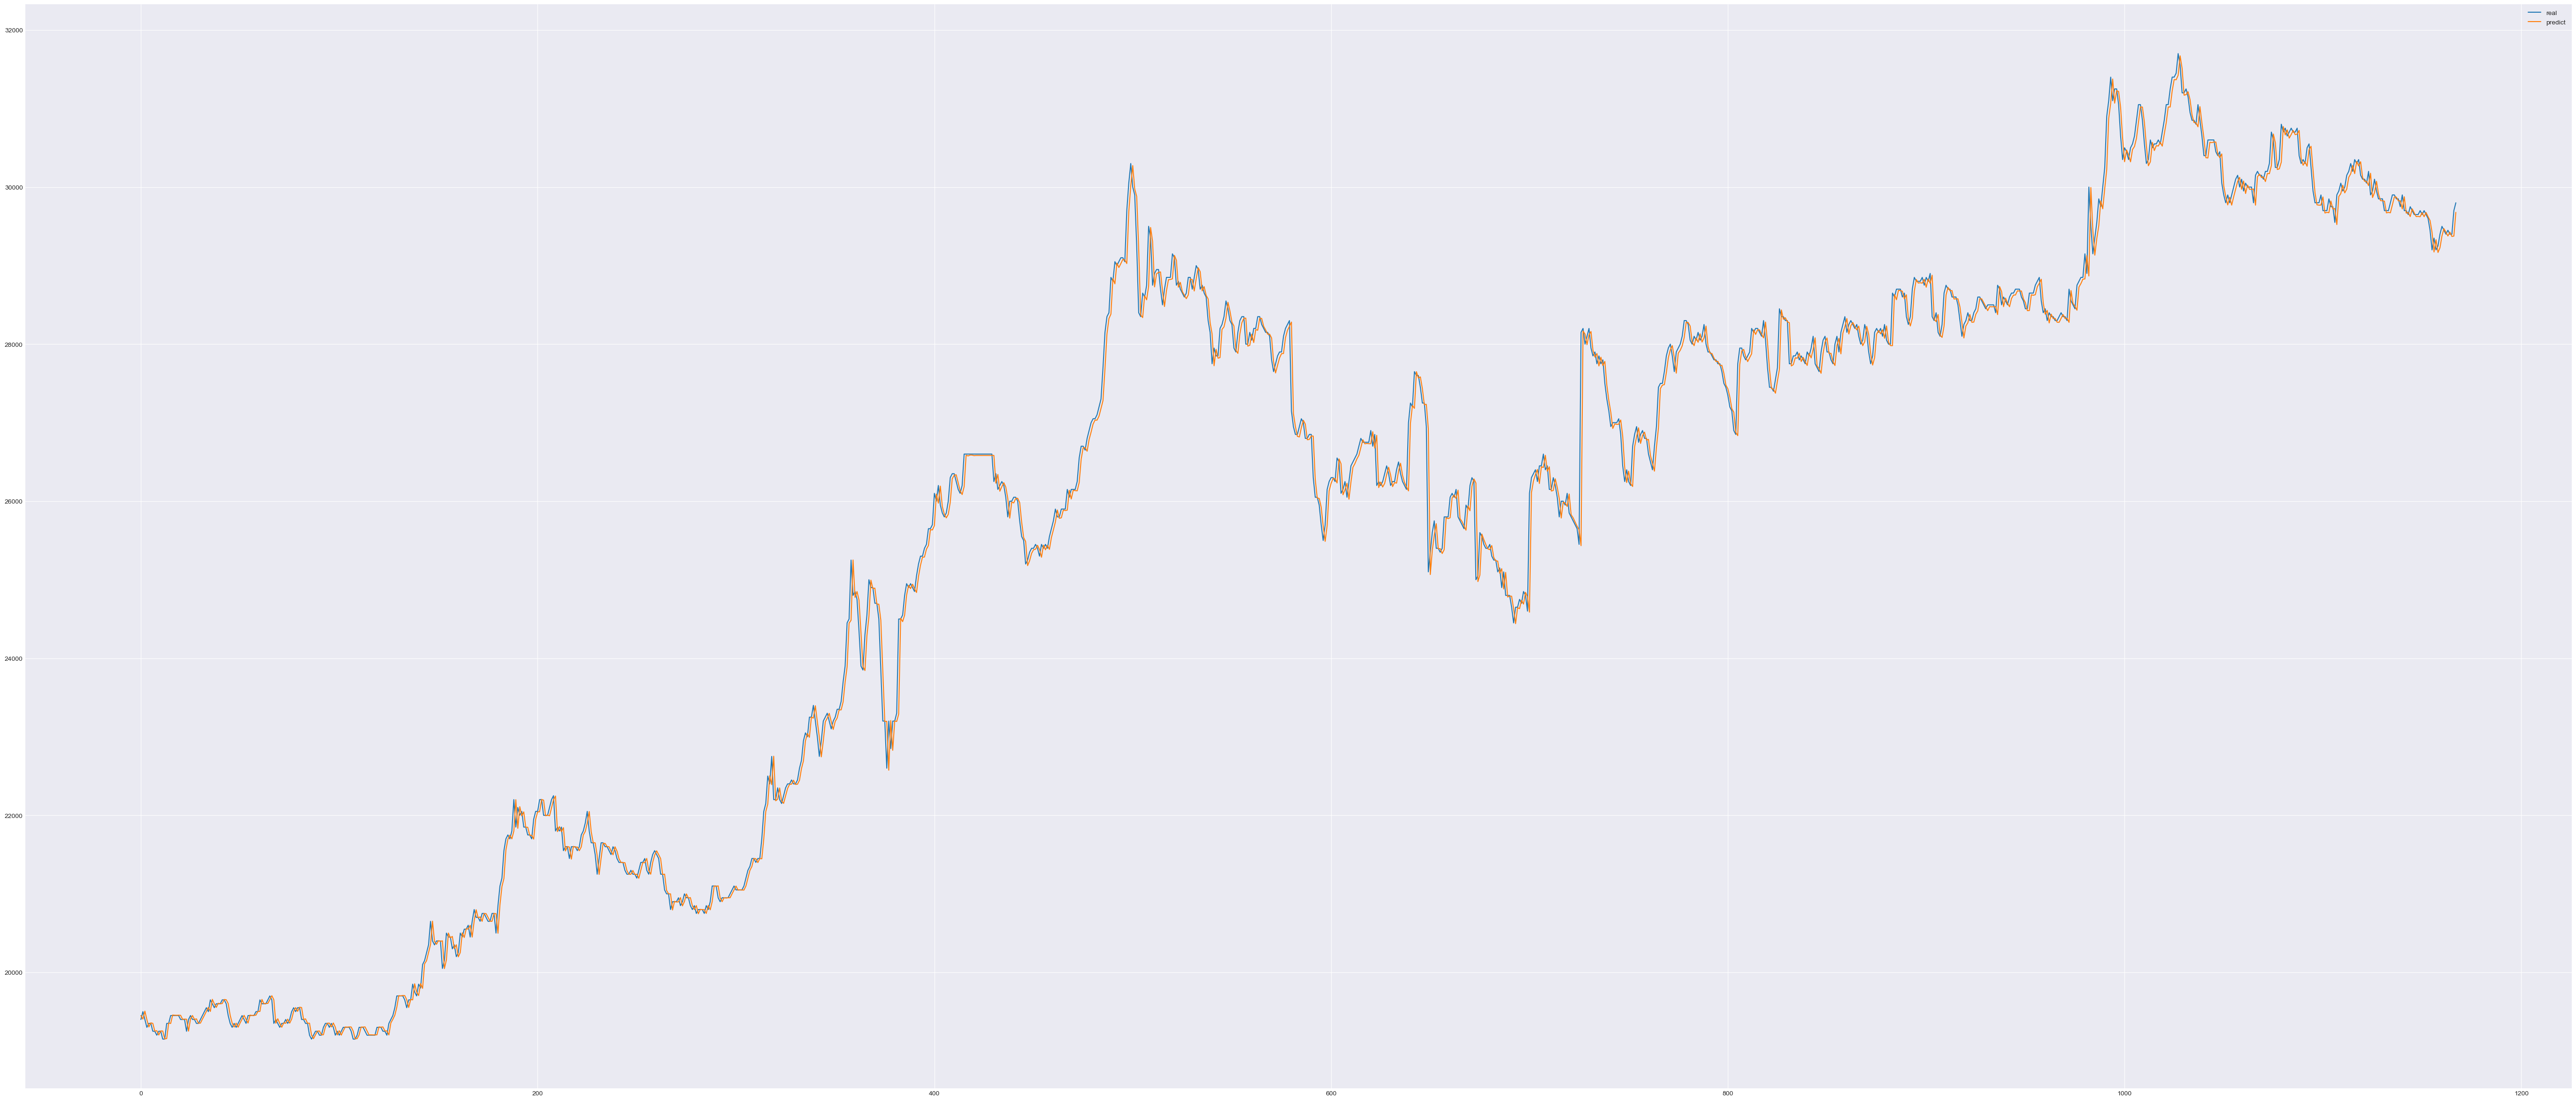

In [24]:
plt.figure(figsize=(70, 30))
plt.plot(x,y_test_real)
plt.plot(x,y_pred_real)
plt.legend(['real', 'predict',])

In [25]:
predicted_price

array([[-0.47205959],
       [-0.49317534],
       [-0.44605817],
       ...,
       [ 4.13169727],
       [ 4.13359603],
       [ 4.27407658]])

In [26]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print(f'MAE:  {mean_absolute_error(y_test_real,y_pred_real)}')
print(f'RMSE:{np.sqrt(mean_squared_error(y_test_real,y_pred_real))}')
print(f'R-Squrea:{r2_score(y_test_real,y_pred_real)}')
print(f'MAPE: {np.mean(np.abs((y_test_real-y_pred_real)/y_test_real))*100}')

MAE:  126.06654096602509
RMSE:212.60726815161777
R-Squrea:0.996680447088378
MAPE: 0.4859642190479509


In [27]:
pd.DataFrame(y_pred_real).to_csv('Linear_best.csv')
pd.DataFrame(y_test_real).to_csv('Linear_Best_real.csv')

In [28]:
import pickle
pickle.dump(linear,open('model.pkl','wb'))
model = pickle.load(open('model.pkl','rb'))


In [29]:
model = pickle.load(open('model.pkl','rb'))
print(model.predict([[29700,29900,29950,29800,29800,29900]]))

[[29820.06069296]]


In [30]:
print(model.predict([[29950,29850,29850,29850,30050,29950]])) #  Predictest วันที่  26 Jan

[[29865.95613942]]


In [31]:
print(model.predict([[29850,29850,29850,30050,29950,30050]]))   #Predictest วันที่  27 Jan

[[29974.63825784]]


In [32]:
29,950.00
30,050.00
29,850.00
29,850.00
29,850.00
29,950.00


(29, 950.0)

In [33]:
29,950.00
30,050.00




(30, 50.0)